<div style="color:black; background-color:#FFF3E9; border: 1px solid #FFE0C3; border-radius: 10px; margin-bottom:0rem">
    <p style="margin:1rem; padding-left: 1rem; line-height: 2.5;">
        ©️ <b><i>Copyright 2024 @ Authors</i></b><br/>
        <i>作者：
            <b>
            <a href="mailto:your_address@email.com">王江海 📨 </a>
            </b>
        </i>
        <br/>
        <i>日期：2024-03-20</i><br/>
        <i>共享协议：</a>本作品采用<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">知识共享署名-非商业性使用-相同方式共享 4.0 国际许可协议(CC BY-NC-SA 4.0)</a>进行许可。</i><br/>
        <i>快速开始：点击上方的</i> <span style="background-color:rgb(85, 91, 228); color:white; padding: 3px; border-radius: 5px;box-shadow: 2px 2px 3px rgba(0, 0, 0, 0.3); font-size:0.75rem;">开始连接</span> <i>按钮，选择 <b><u>bohrium-notebook:2023-04-07</u>镜像</b> 和任意配置机型即可开始。
    </p>
</div>

> **相关链接**：
> 
> - [《计算材料学》（分子动力学）算法原理](https://nb.bohrium.dp.tech/detail/52743861357)
> - [Python Implementation: ***Optimization Algorithms for Molecular Dynamics***](https://nb.bohrium.dp.tech/detail/36773325971)
> - [Python Implementation: ***Integration Algorithms for Molecular Dynamics***](https://nb.bohrium.dp.tech/detail/49396512168)

# 1. Lennard-Jones Potential

---

参考资料：[L-J势场代码实现](https://nb.bohrium.dp.tech/detail/6816684220)

## 1.1 原始势能

Lennard-Jones势是描述非键合原子和分子之间的相互作用的一种经验势。这种势常用于模拟稀有气体和其他简单分子的性质。其数学形式相对简单，但足以捕捉真实系统中观察到的原子或分子之间的排斥和吸引相互作用。Lennard-Jones势（L-J势）是一个数学上简单的模型，用于近似中性原子或分子对之间的相互作用。Lennard-Jones势的函数形式为：

$$
V(r)=4 \varepsilon\left[\left(\frac{\sigma}{r}\right)^{12}-\left(\frac{\sigma}{r}\right)^6\right]
$$

其中：

- $V(r)$ 是势能
- $r$ 是粒子之间的距离
- $\epsilon$ 是势阱深度
- $\sigma$ 是粒子间势能为零的有限距离。

在该势能函数中，$\left(\frac{\sigma}{r}\right)^{12}$项描述了当两个原子或分子非常接近时的强烈排斥作用，这是由于电子云重叠和Pauli排斥原理引起的。而$\left(\frac{\sigma}{r}\right)^6$项描述了两个原子或分子之间的吸引作用，这通常是由于即时偶极产生的范德瓦尔斯力导致的。

尽管Lennard-Jones势是一种非常简化的势，但它已被广泛用于多种模拟中，尤其是在描述稀有气体和初步研究液体和固体的性质时。

### 1.1.1 原始势能表达式

$$
V(r)=4 \varepsilon\left[\left(\frac{\sigma}{r}\right)^{12}-\left(\frac{\sigma}{r}\right)^6\right]
$$

定义一个名为`lennard_jones_potential`的函数来计算两个粒子之间的Lennard-Jones势能。

In [1]:
def lennard_jones_potential(r, epsilon, sigma):
    """
    Calculate the Lennard-Jones potential between two particles.

    Parameters:
    - r (float): Distance between the two particles.
    - epsilon (float): Depth of the potential well.
    - sigma (float): Finite distance at which the inter-particle potential is zero.

    Returns:
    - V (float): Lennard-Jones potential.
    """
    V = 4 * epsilon * ((sigma / r) ** 12 - (sigma / r) ** 6)
    return V

任意选择一个势阱深度 $\varepsilon = 1.0$ 和 $\sigma = 1.0$ ，并为 $r$ 值定义一个范围，从 $0.9\times\sigma$ 到 $3\times\sigma$ 。

使用`matplotlib`绘制Lennard-Jones势能图。

图中，蓝色线表示势能与距离的关系，红色虚线表示 $\sigma$ 的位置，也即势能为零的位置。

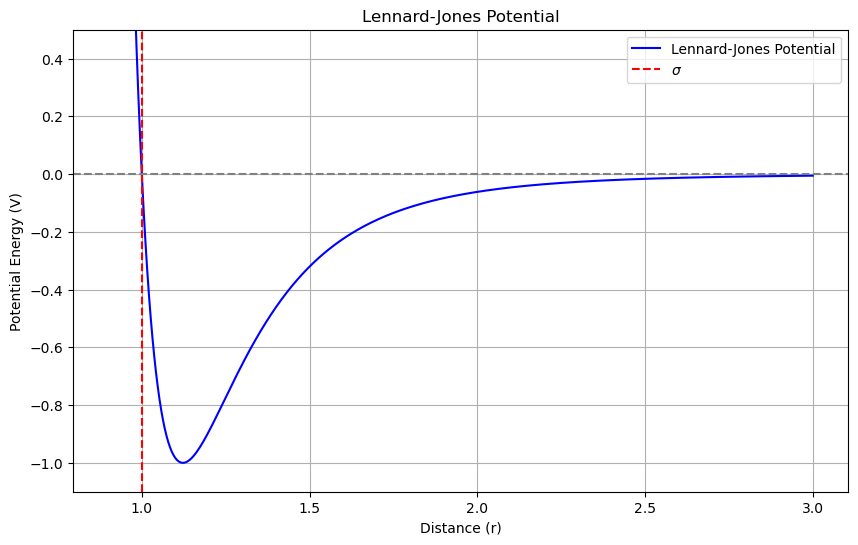

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the plot
epsilon = 1.0  # arbitrary unit
sigma = 1.0    # arbitrary unit
r_values = np.linspace(0.9*sigma, 3*sigma, 400)  # We avoid starting from zero to prevent division by zero
V_values = [lennard_jones_potential(r, epsilon, sigma) for r in r_values]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(r_values, V_values, label="Lennard-Jones Potential", color='blue')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(sigma, color='red', linestyle='--', label=r'$\sigma$')
plt.title("Lennard-Jones Potential")
plt.xlabel("Distance (r)")
plt.ylabel("Potential Energy (V)")
plt.ylim([-1.1, 0.5])
plt.legend()
plt.grid(True)
plt.show()

### 1.1.2 原始受力表达式

$$
F = 24\times\frac{\epsilon}{r^2}\times\left(2 \left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^{6}\right) r_{\text{vec}}
$$

其中，$r_{\text{vec}}=r_1-r_2$。

In [3]:
import numpy as np

def lennard_jones_force_vector(r_vector, epsilon, sigma):
    """
    Calculate the Lennard-Jones force vector between two particles.

    Parameters:
    - r_vector (list or numpy array): 3D vector representing the distance from particle 2 to particle 1.
    - epsilon (float): Depth of the potential well.
    - sigma (float): Finite distance at which the inter-particle potential is zero.

    Returns:
    - F_vector (numpy array): 3D Lennard-Jones force vector.
    """
    r_magnitude = np.linalg.norm(r_vector)
    F_magnitude = 24 * epsilon * ((2 * (sigma / r_magnitude)**12) - (sigma / r_magnitude)**6) / r_magnitude

    F_vector = (r_vector / r_magnitude) * F_magnitude
    return F_vector

In [4]:
# Define test parameters
epsilon_test = 1.0
sigma_test = 1.0

# Test the function with a sample vector
# particle 1 is at (0.0, 0.0, 0.0) and particle 2 at (-1.1, 0.0, 0.0)
test_vector = np.array([1.0, 0.0, 0.0])
lennard_jones_force_vector(test_vector, epsilon_test, sigma_test)

array([24.,  0.,  0.])

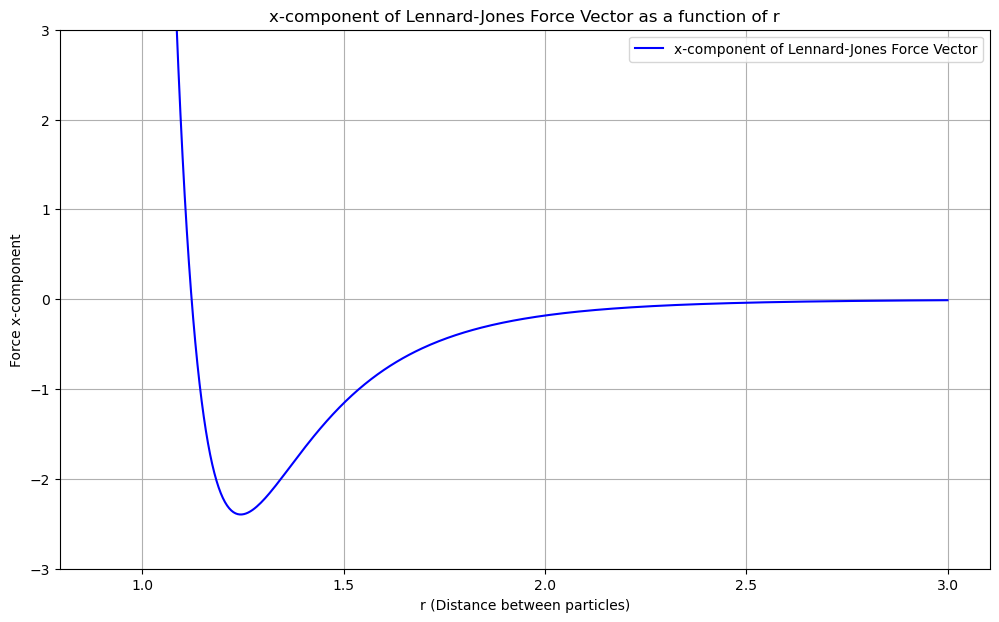

In [5]:
# Compute the first component of the force vector for r_vector values ranging from [0.9, 0, 0] to [3.0, 0, 0]
r_values_force = np.linspace(0.9, 3.0, 400)
force_x_values = [lennard_jones_force_vector([r, 0, 0], 1.0, 1.0)[0] for r in r_values_force]

# Plotting the x-component of the force vector with updated y-axis limits
plt.figure(figsize=(12, 7))
plt.plot(r_values_force, force_x_values, label='x-component of Lennard-Jones Force Vector', color='blue')
plt.xlabel('r (Distance between particles)')
plt.ylabel('Force x-component')
plt.ylim([-3, 3])  # Setting the y-axis limits
plt.legend()
plt.title('x-component of Lennard-Jones Force Vector as a function of r')
plt.grid(True)
plt.show()

## 1.2 势场截断

### 1.2.1 截断函数
Lennard-Jones (L-J) 势是用于描述原子或分子间非键合相互作用的简化模型。在分子动力学模拟中，为了提高效率，通常会在某一截断半径内考虑势能的影响，而忽略超出这一范围的势能效应，但简单地在给定的截断距离截断势能可能会引入不连续性，从而影响模拟的准确性。

为了解决这个问题，通常会使用平滑的截断方案，其中cosine截断是其中之一。cosine截断方法在接近截断半径时平滑地使势能下降到零，从而避免了势能的突然变化。

具体来说，cosine截断可以定义为：

$$
f(r) = \frac{1}{2} \left(1 - \cos\left(\pi \frac{r_c -r}{r_c-r_s}\right)\right)
$$

其中，$f(r)$ 是修正因子，当 $r$ 在 $r_s$ 和 $r_c$ 之间时，它将Lennard-Jones势平滑地从其完整值过渡到零。此处，$r_c$ 是截断半径， $r_s$ 是用户定义的参数，用于描述过渡区域的起始点。

In [6]:
def compute_switching_function(r, switching_start, cutoff_distance):
    """
    Compute the switching function value based on the distance between two particles.

    Parameters
    ----------
    r : float
        Distance between two particles.
    switching_start : float
        Distance where the switching function starts.
    cutoff_distance : float
        Cutoff distance for the potential.

    Returns
    -------
    float
        The value of the switching function at distance r.
    """
    # Check the distance against the switching start and cutoff distance
    if r < switching_start:
        return 1.0
    elif r > cutoff_distance:
        return 0.0

    # Compute the normalized distance within the switching interval
    # t=1 when r=switching_start;  t=0 when r=cutoff_distance
    t = (cutoff_distance - r) / (cutoff_distance - switching_start)

    # Compute the switching function based on the chosen method

    return 0.5 * (1 - np.cos(np.pi * t))

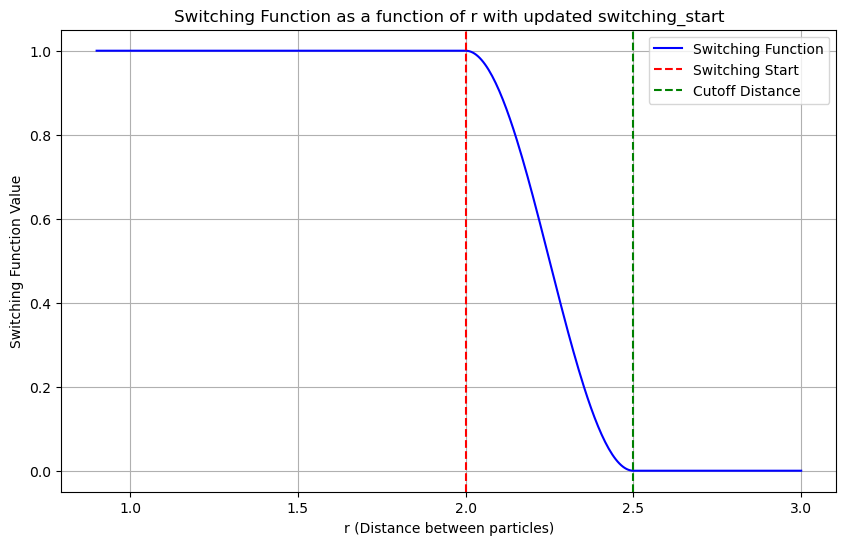

In [7]:
# Update switching_start value
switching_start = 2.0
cutoff_distance = 2.5

# Recompute switching function values
switching_values = [compute_switching_function(r, switching_start, cutoff_distance) for r in r_values]

plt.figure(figsize=(10, 6))
plt.plot(r_values, switching_values, label='Switching Function', color='blue')
plt.axvline(x=switching_start, color='red', linestyle='--', label='Switching Start')
plt.axvline(x=2.5, color='green', linestyle='--', label='Cutoff Distance')
plt.xlabel('r (Distance between particles)')
plt.ylabel('Switching Function Value')
plt.legend()
plt.title('Switching Function as a function of r with updated switching_start')
plt.grid(True)
plt.show()

### 1.2.2 截断后的势能表达式

利用 $\cos$ 修正因子，带有cosine截断的Lennard-Jones势可以写作：

$$
V_{\text{cosine}}(r) = f(r) \times 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

当 $r>r_c$ 时，$V_{\text{cosine}}(r)$ 为零。

cosine截断不仅可以保证势能和力在截断半径处的连续性，还能在某些情况下提高模拟的准确性，尤其是当液体或气体系统的密度较低时。

In [8]:
def lennard_jones_potential_with_cutoff(r, epsilon, sigma, switching_start, cutoff_distance):
    """
    Calculate the Lennard-Jones potential between two particles with cutoff.

    Parameters:
    - r (float): Distance between the two particles.
    - epsilon (float): Depth of the potential well.
    - sigma (float): Finite distance at which the inter-particle potential is zero.
    - switching_start : float
        Distance where the switching function starts.
    - cutoff_distance : float
        Cutoff distance for the potential.

    Returns:
    - V (float): Lennard-Jones potential with cutoff.
    """
    V = lennard_jones_potential(r, epsilon, sigma)*compute_switching_function(r, switching_start, cutoff_distance)
    return V

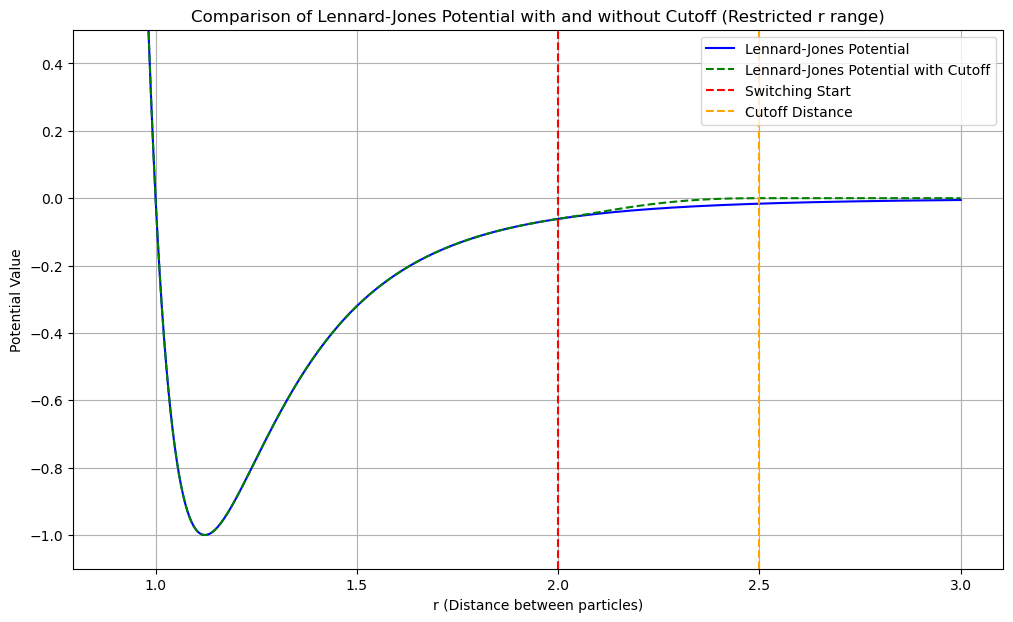

In [9]:
# Redefine r_values to be within the interval [0.9, 3]
r_values_restricted = np.linspace(0.9, 3, 400)

# Recompute Lennard-Jones potential values for the new r_values
lj_values_restricted = [lennard_jones_potential(r, epsilon_test, sigma_test) for r in r_values_restricted]
lj_with_cutoff_values_restricted = [lennard_jones_potential_with_cutoff(r, epsilon_test, sigma_test, switching_start, cutoff_distance) for r in r_values_restricted]

plt.figure(figsize=(12, 7))
plt.plot(r_values_restricted, lj_values_restricted, label='Lennard-Jones Potential', color='blue')
plt.plot(r_values_restricted, lj_with_cutoff_values_restricted, label='Lennard-Jones Potential with Cutoff', color='green', linestyle='--')
plt.axvline(x=switching_start, color='red', linestyle='--', label='Switching Start')
plt.axvline(x=2.5, color='orange', linestyle='--', label='Cutoff Distance')
plt.xlabel('r (Distance between particles)')
plt.ylabel('Potential Value')
plt.ylim([-1.1,0.5])
plt.legend()
plt.title('Comparison of Lennard-Jones Potential with and without Cutoff (Restricted r range)')
plt.grid(True)
plt.show()

### 1.2.3 截断后的受力表达式

Switching function（或切换函数）在分子动力学中常用于势能的截断处理，确保在截断距离附近势能和力平滑地趋近于零，从而避免不连续性和相关的数值问题。

给定一个切换函数 $S(r)$，当考虑势能的计算时，不仅需要知道 $S(r)$ 的值，还需要知道其对于原子间距离 $r$ 的导数，因为力是势能关于距离的导数。具体地说，势能函数 $V(r)$ 对应的力 $F(r)$ 可以表示为：

$$
F(r) = -\frac{dV(r)}{dr}
$$

如果有一个截断处理后的势能 $V_{\text{mod}}(r) = V(r) \times S(r)$，其中 $V(r)$ 是原始未经截断的势能，那么对应的力可以表示为：

$$
F_{\text{mod}}(r) = -\frac{d(V(r) \times S(r))}{dr}
$$

为了计算上述导数，需要同时考虑 $V(r)$ 和 $S(r)$ 的导数。特别的，需要知道切换函数 $S(r)$ 对于 $r$ 的导数，因为这会影响计算得到力的值。

总的来说，了解切换函数的导数在分子动力学模拟中是至关重要的，因为它直接影响到计算得到的原子间的力，这些力决定了原子的运动轨迹和模拟的动力学性质。

**Cosine切换函数**是分子动力学中用于势能截断的一种常见方法。它的主要优点是在截断距离附近提供平滑的过渡，以避免在原子间势能和力中的不连续性。

设定一个截断距离 $r_c$，在 $r \leq r_{\text{start}}$ 时，势能保持不变，而在 $r_{\text{start}} < r \leq r_c$ 之间，势能开始经过cosine切换函数平滑地趋向于0。

Cosine切换函数的一种常见形式为：
$$
S(r) = \frac{1}{2} \left(1 - \cos\left(\pi \frac{r_c - r}{r_c - r_{\text{start}}}\right)\right)
$$

当 $r \leq r_{\text{start}}$ 时，$S(r) = 1$；

当 $r > r_c$ 时，$S(r) = 0$。

上述切换函数对 $r$ 的导数：

$$
\frac{dS(r)}{dr} = -\frac{\pi}{2(r_c - r_{\text{start}})} \sin\left(\pi \frac{r_c - r}{r_c - r_{\text{start}}}\right)
$$

这个导数在计算截断范围内原子间力时是必要的，因为力是势能相对于距离的导数。

使用cosine切换函数及其导数，可以确保在截断距离附近势能和力都是平滑的，这是在分子动力学模拟中避免不物理的行为和数值不稳定性的关键。

In [10]:
def compute_switching_derivative(r, switching_start, cutoff_distance):
    """
    Compute the derivative of the switching function based on the distance between two particles.

    Parameters
    ----------
    r : float
        Distance between two particles.
    switching_start : float
        Distance where the switching function starts.
    cutoff_distance : float
        Cutoff distance for the potential.

    Returns
    -------
    float
        The derivative of the switching function at distance r.
    """

    if r < switching_start or r > cutoff_distance:
        return 0.0
    else:
        return -0.5 * (np.pi / (cutoff_distance - switching_start)) * np.sin(np.pi * (cutoff_distance - r) / (cutoff_distance - switching_start))

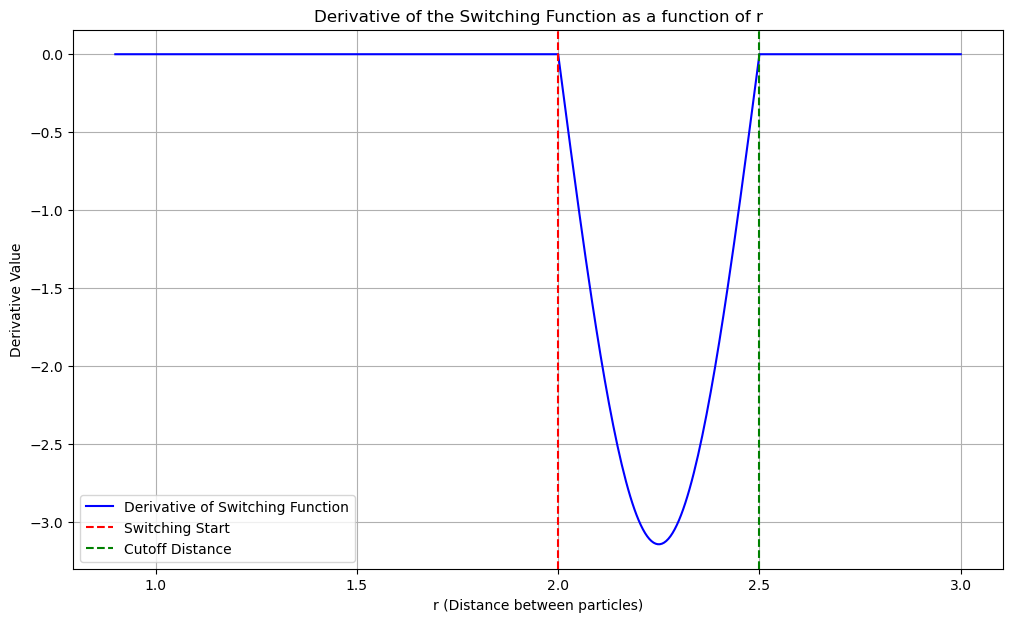

In [11]:
# Generate values for the derivative of the switching function
r_values_derivative = np.linspace(0.9, 3, 400)
switching_derivative_values = [compute_switching_derivative(r, 2.0, 2.5) for r in r_values_derivative]

plt.figure(figsize=(12, 7))
plt.plot(r_values_derivative, switching_derivative_values, label='Derivative of Switching Function', color='blue')
plt.axvline(x=2.0, color='red', linestyle='--', label='Switching Start')
plt.axvline(x=2.5, color='green', linestyle='--', label='Cutoff Distance')
plt.xlabel('r (Distance between particles)')
plt.ylabel('Derivative Value')
plt.legend()
plt.title('Derivative of the Switching Function as a function of r')
plt.grid(True)
plt.show()

In [12]:
def lennard_jones_force_vector_with_cutoff(r_vector, epsilon, sigma, switching_start, cutoff_distance):
    """
    Compute the Lennard-Jones force on a given particle due to all of its neighboring particles,
    considering the cutoff.

    Parameters
    ----------

    Returns
    -------
    net_force : np.array
        The total force exerted on the target particle.
    """
    net_force = np.zeros_like(r_vector, dtype=float)

    r_magnitude = np.linalg.norm(r_vector)

    if r_magnitude <= cutoff_distance:
        # Compute force without considering cutoff
        force_magnitude = 24 * epsilon * ((2 * (sigma / r_magnitude)**12) - (sigma / r_magnitude)**6) / r_magnitude

        switching_value =compute_switching_function(r_magnitude, switching_start, cutoff_distance)
        switching_derivative = compute_switching_derivative(r_magnitude, switching_start, cutoff_distance)
        force_magnitude *= switching_value
        # Add extra force due to derivative of switching function
        force_magnitude -= switching_derivative * 4 * epsilon * ((sigma / r_magnitude)**12 - (sigma / r_magnitude)**6)

        # Add force vector to total force
        net_force = force_magnitude * (r_vector / r_magnitude)

    return net_force

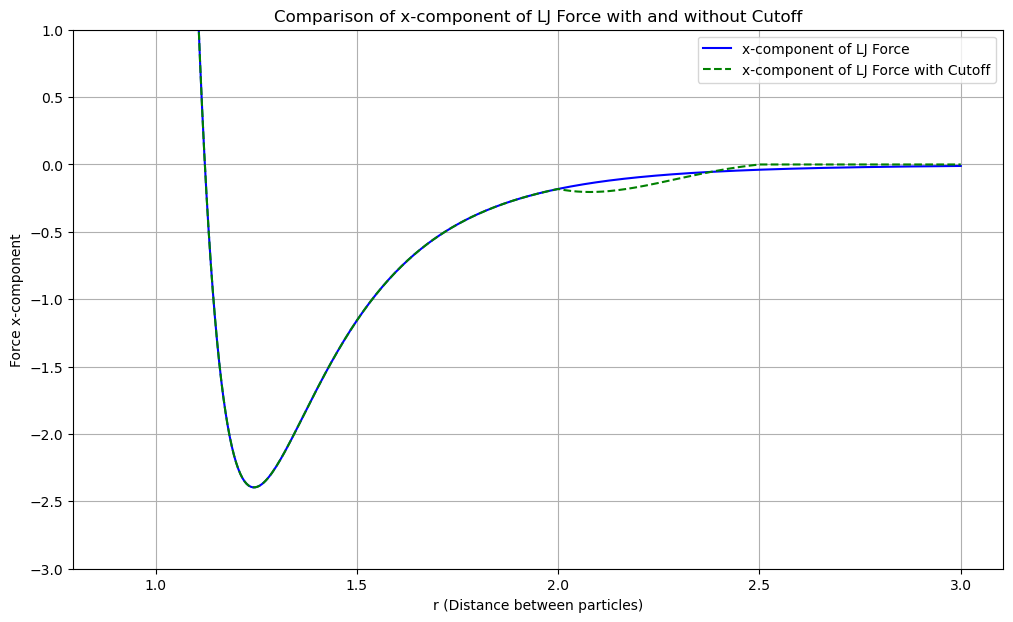

In [13]:
# Compute the first component of the net force vector for r_vector values ranging from [0.9, 0, 0] to [3.0, 0, 0]
r_values_force = np.linspace(0.9, 3.0, 400)
force_x_with_cutoff_values = [lennard_jones_force_vector_with_cutoff(np.array([r, 0, 0]), 1.0, 1.0, 2.0, 2.5)[0] for r in r_values_force]

plt.figure(figsize=(12, 7))
plt.plot(r_values_force, force_x_values, label='x-component of LJ Force', color='blue')
plt.plot(r_values_force, force_x_with_cutoff_values, label='x-component of LJ Force with Cutoff', color='green', linestyle='--')
plt.xlabel('r (Distance between particles)')
plt.ylabel('Force x-component')
plt.ylim([-3, 1])  # Setting the y-axis limits
plt.legend()
plt.title('Comparison of x-component of LJ Force with and without Cutoff')
plt.grid(True)
plt.show()

# 2. Force claculation with L-J potential

---

参考资料：
1. [周期性边界条件代码实现](https://nb.bohrium.dp.tech/detail/35866925971)
2. [L-J势场代码实现](https://nb.bohrium.dp.tech/detail/6816684220)

In [14]:
import numpy as np
from typing import List
import matplotlib.pyplot as plt

## 2.1 Periodic Boundary Condition (PBC)

### `class Particle`
`class Particle`是一个表示**粒子**的类。以下是各部分的详细说明：

1. `__init__(self, position):` 类的**构造函数**，用于初始化`class Particle`实例。  
它接受一个位置参数，并将其转换为一个`NumPy`数组，然后存储在名为`_position`的**私有属性**中。

2. `__str__(self):` 类的**字符串方法**，通过调用它将`object Particle`转换为字符串。  
此方法将返回一个**字符串**，其中包含粒子的位置信息。

3. `@property:` Python装饰器之一，它将紧随其后的方法定义为**获取**相应属性的函数。  
此例中，`position`方法返回私有属性`_position`的值，因此，当你尝试访问`.position`时，实际上调用了此方法。

4. `@position.setter:` Python装饰器之一，它将紧随其后的方法定义为**设置**相应属性的函数。  
此例中，`position`方法接受一个值，将其转换为`NumPy`数组，然后将这个数组赋值给`_position`。因此，当尝试设置`.position`的值时，实际上调用了此方法。

**综上，`class Particle`提供了一种封装粒子位置信息的方法，并且提供了获取和设置位置信息的接口。其中，位置信息被保存为`NumPy`数组，以便于进行各种数值计算。**

In [15]:
class Particle:
    def __init__(self, position):
        self._position = np.array(position, dtype=float)

    def __str__(self):
        return f"Particle position =\n{self.position}"

    @property
    def position(self):
        return self._position

    @position.setter
    def position(self, value):
        self._position = np.array(value)

In [16]:
particle1 = Particle(position=(5.0, 7.0))
print(particle1)

particle2 = Particle(position=(1.0, -2.0))
print(particle2)

Particle position =
[5. 7.]
Particle position =
[ 1. -2.]


### `class Box`
`class Box`是一个用于表示**盒子**的类。以下是各部分的详细说明：

1. `__init__(self, lower, upper):` 类的**构造函数**，用于初始化`class Box`实例。  
它接受两个参数，`lower`和`upper`，分别表示盒子的下界和上界。同时，计算这两个值的差并将其赋值给`length`属性，表示盒子的长度。

2. `__str__(self):` 类的**字符串方法**，通过调用它将`object Box`转换为字符串。  
此方法将返回一个**字符串**，其中包含盒子的维度（即长度）信息。

**综上，`class Box`提供了一种表示盒子的方法，通过盒子的上界和下界来定义盒子，并获得盒子的长度。**

In [17]:
class Box:
    def __init__(self, lower, upper):
        self.lower = np.array(lower,dtype=float)
        self.upper = np.array(upper,dtype=float)
        self.length = self.upper - self.lower

    def __str__(self):
        return f"Box dimension {self.length}"

In [18]:
box_demo = Box(np.array([0.0, 0.0]), np.array([10.0, 10.0]))
print(box_demo)

Box dimension [10. 10.]


### `class BoundaryCondition`
`class BoundaryCondition`是一个表示**边界条件**的抽象基类，其中定义了两个方法，`apply`和`displacement`，但这两个方法都没有实现，抛出`NotImplementedError`。

`class PeriodicBoundaryCondition`继承自`class BoundaryCondition`，实现了周期性边界条件。

`apply(self, particles: List[Particle], box: Box) -> None:` 将周期性边界条件应用到系统中所有粒子上。  
它接受两个参数：一个是粒子的列表，另一个是表示系统边界的`Box`对象。  
对于粒子列表中的每一个粒子，此方法会更新其位置，使其符合周期性边界条件。具体操作是，将粒子位置减去盒子的下界，然后对盒子的长度取模，最后再加上盒子的下界。

`displacement(self, position1: np.ndarray, position2: np.ndarray, box: Box) -> np.ndarray:` 计算在周期性系统中，两个位置之间的最短位移矢量。  
它接受三个参数：第一个和第二个是两个粒子的位置，第三个是表示系统边界的`Box`对象。 
 
 方法首先计算两个粒子位置的差，然后减去这个差和盒子长度的商（四舍五入到最近的整数）与盒子长度的乘积，最后返回结果值，此即考虑了周期性边界条件的位移短矢量。

**综上，`class PeriodicBoundaryCondition`提供了一种在周期性系统中，处理粒子位置和计算位置间位移矢量的方法。**

In [19]:
class BoundaryCondition:
    """Abstract base class for boundary conditions."""

    def apply(self, particles: List[Particle], box: Box) -> None:
        raise NotImplementedError

    def displacement(self, position1: np.ndarray, position2: np.ndarray, box: Box) -> np.ndarray:
        raise NotImplementedError


class PeriodicBoundaryCondition(BoundaryCondition):
    """Implements periodic boundary conditions."""

    def apply(self, particles: List[Particle], box: Box) -> None:
        """
        Applies periodic boundary conditions to all particles in the system.

        Parameters
        ----------
        particles : List[Particle]
            List of all Particle instances in the system.
        box : Box
            The Box instance defining the boundaries of the system.

        Returns
        -------
        None

        Notes
        -----
        This method updates the positions of particles in the system
        such that they adhere to the periodic boundary conditions.
        """
        for p in particles:
            p.position = (p.position - box.lower) % box.length + box.lower

    def displacement(self, position1: np.ndarray, position2: np.ndarray, box: Box) -> np.ndarray:
        """
        Computes the shortest displacement vector between two positions in a periodic system.

        Parameters
        ----------
        position1 : np.array
            Position of the first particle.
        position2 : np.array
            Position of the second particle.
        box : Box
            The box object representing the system's boundary.

        Returns
        -------
        np.array
            The displacement vector from position2 to position1 taking into account periodic boundary conditions.
        """
        dr = position1 - position2
        dr = dr - np.rint(dr / box.length) * box.length
        return dr

    def displacement_list(self, particles: List[Particle], box: Box) -> np.ndarray:
        """
        Computes the shortest displacement vector between two positions in a periodic system.

        Parameters
        ----------
        particles : List[Particle]
            Set of all Particles in the system.
        box : Box
            The box object representing the system's boundary.

        Returns
        -------
        np.array
            The displacement vector from position2 to position1 taking into account periodic boundary conditions.
        """
        r_vec = np.zeros((len(particles), len(particles) - 1, 3))
        for i in range(len(particles)):
            for p in particles:
                if (p.position == particles[i].position).all():
                    pass
                else:
                    r_vec[i] = particles[i].position - p.position
                    r_vec[i] = r_vec[i] - np.rint(r_vec[i] / box.length) * box.length
        return r_vec

In [20]:
particles = [particle1, particle2]
boundary_condition = PeriodicBoundaryCondition()

# output particles before applying boundary condition
print('\n===== Before PBC =====\n')
for particle in particles:
    print(particle)

print('\n===== After PBC =====\n')
# output particles after applying boundary condition
boundary_condition.apply(particles, box_demo)
for particle in particles:
    print(particle)

print('\n===== Displacement =====\n')
print('displacement:',boundary_condition.displacement(particle1.position, particle2.position, box_demo))


===== Before PBC =====

Particle position =
[5. 7.]
Particle position =
[ 1. -2.]

===== After PBC =====

Particle position =
[5. 7.]
Particle position =
[1. 8.]

===== Displacement =====

displacement: [ 4. -1.]


## 2.2 Neighbor List

In [21]:
class NeighborList:
    """Abstract base class for neighbor list."""

    def build(self):
        raise NotImplementedError

    def update(self) -> None:
        raise NotImplementedError


class VerletList(NeighborList):

    def __init__(self, particles, box, boundary_condition, cutoff, skin_depth):
        self.particles = particles
        self.box = box
        self.boundary_condition = boundary_condition
        self.cutoff = cutoff
        self.skin_depth = skin_depth

    def build(self):
        """Build neighbor list of the particle."""
        self.neighbor_list = {}
        self.previous_positions = {p: np.copy(p.position) for p in self.particles}

        for p1 in self.particles:
            self.neighbor_list[p1] = {}
            for p2 in self.particles:
                displacement = self.boundary_condition.displacement(p1.position, p2.position, self.box)
                if p1 != p2 and np.linalg.norm(displacement) < (self.cutoff + self.skin_depth):
                    self.neighbor_list[p1].update({p2: displacement})

    def update(self):
        max_displacement = max(
            np.linalg.norm(self.boundary_condition.displacement(p.position, self.previous_positions[p], self.box)) for p
            in self.particles)
        if max_displacement > self.skin_depth / 2:
            self.build()

## 2.3 Potential

In [22]:
class Potential:
    """Abstract base class for potential."""
    def energy_calc(self, particles, nn_list, start_dist, end_dist):
        raise NotImplementedError

    def force_calc(self, nn_list, start_dist, end_dist):
        raise NotImplementedError


class LJPotential(Potential):

    def __init__(self, particles, epsilon, sigma, cutoff='soft'):
        self.particles = particles
        self.epsilon = epsilon
        self.sigma = sigma
        self.cutoff = cutoff

        if cutoff not in ['hard', 'soft']:
            raise ValueError('Invalid type of cutoff.')

    def _switching_function(self, r, start_dist, end_dist):
        # Check the distance against the switching start and cutoff distance
        if r < start_dist:
            return 1.0
        elif r > end_dist:
            return 0.0

        # Compute the normalized distance within the switching interval
        # t = 1 when r = start_dist;  t = 0 when r = end_dist
        t = (end_dist - r) / (end_dist - start_dist)

        # Compute the switching function based on the chosen method

        return 0.5 * (1 - np.cos(np.pi * t))

    def _switching_derivative(self, r, start_dist, end_dist):
        if r < start_dist or r > end_dist:
            return 0.0
        else:
            return -0.5 * (np.pi / (end_dist - start_dist)) * np.sin(np.pi * (end_dist - r) / (end_dist - start_dist))

    def _energy_calc(self, r):
        if self.cutoff == 'hard':
            V = 4 * epsilon * ((sigma / r) ** 12 - (sigma / r) ** 6)
            return V

        if self.cutoff == 'soft':
            V = (self.switching_function(r, start_dist, end_dist) *
                 4 * epsilon * ((sigma / r) ** 12 - (sigma / r) ** 6))
            return V

    def _force_vector(self, r_vec, start_dist, end_dist):
        net_force = np.zeros_like(r_vec, dtype=float)

        r_magnitude = np.linalg.norm(r_vec)

        if r_magnitude <= end_dist:
            # Compute force without considering cutoff
            force_magnitude = 24 * epsilon * (
                        (2 * (sigma / r_magnitude) ** 12) - (sigma / r_magnitude) ** 6) / r_magnitude

            if self.cutoff == 'soft':
                switching_value = self._switching_function(r_magnitude, start_dist, end_dist)
                switching_derivative = self._switching_derivative(r_magnitude, start_dist, end_dist)
                force_magnitude *= switching_value
                # Add extra force due to derivative of switching function
                force_magnitude -= switching_derivative * 4 * epsilon * (
                            (sigma / r_magnitude) ** 12 - (sigma / r_magnitude) ** 6)

            # Add force vector to total force
            net_force = force_magnitude * (r_vec / r_magnitude)

        return net_force

    def _force_calc(self, r_vec, start_dist, end_dist):
        r_magnitude = np.linalg.norm(r_vec)

        if r_magnitude <= cutoff_distance:
            # Compute force without considering cutoff
            force_magnitude = 24 * epsilon * (
                    (2 * (sigma / r_magnitude) ** 12) - (sigma / r_magnitude) ** 6) / r_magnitude

            if self.cutoff == 'soft':
                switching_value = self.switching_function(r_magnitude, start_dist, end_dist)
                switching_derivative = self.switching_derivative(r_magnitude, start_dist, end_dist)
                force_magnitude *= switching_value
                # Add extra force due to derivative of switching function
                force_magnitude -= switching_derivative * 4 * epsilon * (
                        (sigma / r_magnitude) ** 12 - (sigma / r_magnitude) ** 6)
        else:
            force_magnitude = 0.0

        return force_magnitude

    def energy_calc(self, particles, nn_list, start_dist, end_dist):
        raise NotImplementedError

    def force_calc(self, nn_list, start_dist, end_dist):
        self.force = {}
        self.force_vector = {}
        for p1 in nn_list.keys():
            net_force = np.zeros((1, 3))
            for p2 in nn_list[p1]:
                r_vec = nn_list[p1][p2]
                force_vector = self._force_vector(r_vec, start_dist, end_dist)
                net_force += force_vector

            self.force_vector[p1] = net_force
            self.force[p1] = np.linalg.norm(net_force)

## 2.4 Helper Function

In [23]:
def genRandomParticles(natoms, system_scale=10):
    # Generate random atom positions
    dim = 3  # 3 dimensional
    minDist = 0.8  # minimum required distance between atoms
    positions = np.zeros((natoms, dim))
    positions[0] = np.random.rand(dim)
    for i in range(1, natoms):
        iter, maxIter = 0, 1e5
        while True and iter < maxIter:
            iter += 1
            newpos = np.random.rand(dim) * system_scale
            dist = newpos - positions[0:i]
            if np.all(np.linalg.norm(dist, axis=1) > minDist):
                break
        assert (iter < maxIter)
        positions[i] = newpos

    particles = []
    for i in range(natoms):
        particles.append(Particle(positions[i]))

    return particles


def neighborlist_calc(particles, system_scale, cutoff_dist, skin_depth, i=None):
    box = Box(np.array([0.0, 0.0, 0.0]), np.array([system_scale, system_scale, system_scale]))

    pbc = PeriodicBoundaryCondition()
    pbc.apply(particles, box)

    neighbor = VerletList(particles, box, pbc, cutoff_dist, skin_depth)
    neighbor.build()
    if i is None:
        nn_list = neighbor.neighbor_list
    elif type(i) is int:
        nn_list = neighbor.neighbor_list[particles[i - 1]]
    else:
        raise TypeError("i should be None or an integer.")

    return nn_list


def visualize(particles: List[Particle], system_scale, cutoff_dist, skin_depth, i: int):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # 获取目标粒子和其近邻列表中的粒子
    target_p = particles[i - 1]

    neighbor_list = neighborlist_calc(particles, system_scale, cutoff_dist, 0)
    verlet_list = neighborlist_calc(particles, system_scale, cutoff_dist, skin_depth)

    neighbor_particles = neighbor_list[target_p]
    verlet_particles = verlet_list[target_p]

    verlet_hull = np.array([p for p in verlet_particles if p not in neighbor_particles])
    other_particles = np.array([p for p in particles if p not in verlet_particles])
    neighbor_positions = np.array([p.position for p in neighbor_particles])
    verlet_hull_positions = np.array([p.position for p in verlet_hull])
    positions = np.array([p.position for p in other_particles if p is not target_p])

    ax.scatter(target_p.position[0], target_p.position[1], target_p.position[2], s=100, marker="*", label='Particles',
               color='r')

    ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], s=100, label='Particles', color='grey')

    ax.scatter(neighbor_positions[:, 0], neighbor_positions[:, 1], neighbor_positions[:, 2], label='Neighbours', s=100,
               color='r')

    ax.scatter(verlet_hull_positions[:, 0], verlet_hull_positions[:, 1], verlet_hull_positions[:, 2], label='Verlet',s=100,
               color='y')

    center = target_p.position
    r1 = cutoff_dist

    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 50)
    x = center[0] + r1 * np.outer(np.cos(u), np.sin(v))
    y = center[1] + r1 * np.outer(np.sin(u), np.sin(v))
    z = center[2] + r1 * np.outer(np.ones(np.size(u)), np.cos(v))

    ax.plot_surface(x, y, z, color='orange', alpha=0.3)

    r2 = cutoff_dist + skin_depth

    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 50)
    x = center[0] + r2 * np.outer(np.cos(u), np.sin(v))
    y = center[1] + r2 * np.outer(np.sin(u), np.sin(v))
    z = center[2] + r2 * np.outer(np.ones(np.size(u)), np.cos(v))

    ax.plot_surface(x, y, z, color='wheat', alpha=0.3)

    vertices = np.array([[0, 0, 0],
                         [system_scale, 0, 0],
                         [system_scale, system_scale, 0],
                         [0, system_scale, 0],
                         [0, 0, system_scale],
                         [system_scale, 0, system_scale],
                         [system_scale, system_scale, system_scale],
                         [0, system_scale, system_scale]])

    edges = [(0, 1), (1, 2), (2, 3), (3, 0),
             (4, 5), (5, 6), (6, 7), (7, 4),
             (0, 4), (1, 5), (2, 6), (3, 7)]

    for edge in edges:
        ax.plot3D(*zip(vertices[edge[0]], vertices[edge[1]]), color="grey")

    ax.set_title('Particle Visualization')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.axis('off')

    plt.show()

## 2.5 main

In [24]:
# Parameters
natoms = 100
system_scale = 20
start_dist = 3
cutoff_dist = 6
skin_depth = 2
epsilon = 1.0
sigma = 1.0

In [25]:
# Generate random particles
particles = genRandomParticles(natoms, system_scale)

# Instantiate
box = Box(np.array([0.0, 0.0, 0.0]), np.array([system_scale, system_scale, system_scale]))
pbc = PeriodicBoundaryCondition()
lj_potential = LJPotential(particles, epsilon, sigma, cutoff='soft')

# Apply periodic boundary condition
pbc.apply(particles, box)
nn_list = neighborlist_calc(particles, system_scale, cutoff_dist, skin_depth)
lj_potential.force_calc(nn_list, start_dist, cutoff_dist)

In [26]:
nn_list_p1 = neighborlist_calc(particles, system_scale, cutoff_dist, skin_depth, 1)
nn_list_p1_position = {}
for p in nn_list_p1.keys():
    nn_list_p1_position.update({str(p.position): nn_list_p1[p]})

print("Neighbor index\t\t\t\tposition\t\t\t\tdistance")
print("----------------------------------------------------------------------------------------------------")
for i, neighb in enumerate(nn_list_p1_position.keys()):
    print("{}\t\t\t\t{}\t\t\t\t{}".format(i + 1, neighb, np.linalg.norm(nn_list_p1_position[neighb])))
print("====================================================================================================")

Neighbor index				position				distance
----------------------------------------------------------------------------------------------------
1				[3.38921236 3.82752732 3.75560103]				5.221799026927742
2				[4.91402282 5.99685411 1.68749573]				6.838864329257464
3				[0.77431564 7.00350074 5.03839924]				7.703610445492114
4				[ 4.17707363  2.68791143 19.17173938]				4.222815839555474
5				[19.29036132 17.76324729 15.815136  ]				5.747151478665615
6				[ 5.37150575 18.70122795  3.32630155]				5.855959982391735
7				[16.89993008 16.01796159 16.67910059]				7.174239449082757
8				[ 0.63428631 18.61648417  6.66019851]				6.507558013891987
9				[3.87980444 6.39811612 1.07662855]				6.508152732517119
10				[ 1.77337115 13.99139051  3.20326702]				7.371385088760269
11				[18.20104304  2.92978049  5.82385495]				6.237551847243433
12				[ 0.49281342  3.0559274  13.85986496]				7.043029759524779
13				[ 4.25522069 19.4808095  15.28255151]				6.476593845404013
14				[ 3.695844   15.66077784  1.64

In [27]:
print("Particle Index\t\t\t\tForce Vector\t\t\t\tForce")
print("----------------------------------------------------------------------------------------------------")
for i, p in enumerate(particles):
    print("{}\t\t\t\t{}\t\t\t\t{}".format(i + 1, lj_potential.force_vector[p], lj_potential.force[p]))
print("====================================================================================================")

Particle Index				Force Vector				Force
----------------------------------------------------------------------------------------------------
1				[[ 0.00089032  0.00050718 -0.00025966]]				0.0010570369288748702
2				[[ 0.00999018  0.01019335 -0.012765  ]]				0.019148193635416998
3				[[-0.05942505  0.0054193   0.03845995]]				0.07099206547990856
4				[[-0.00239993  0.00071278 -0.00140982]]				0.0028732051974812867
5				[[ 0.00220754  0.00574504 -0.00486045]]				0.007842370939413793
6				[[-0.05572174 -0.05475902  0.08770627]]				0.1174557504524372
7				[[ 0.01837173  0.00324896 -0.00140317]]				0.018709491304969697
8				[[-1.93524176  0.74571832 -1.13927864]]				2.366265471940797
9				[[ 0.01354848 -0.00032951 -0.00546694]]				0.014613602066754843
10				[[-0.06732844  0.02255366  0.1091296 ]]				0.13019622180935111
11				[[-0.02075109  0.00152032 -0.00560255]]				0.021547794691662757
12				[[-0.08520275 -0.09253335  0.37422168]]				0.39479589477982835
13				[[ 1.36644089e-03 -7.2566439

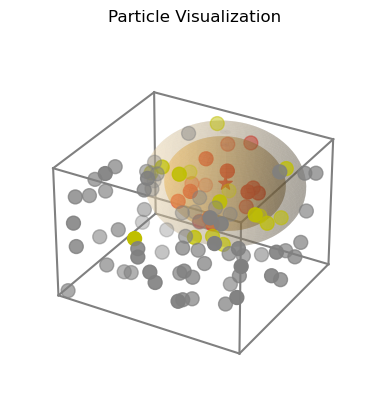

In [28]:
visualize(particles, system_scale, cutoff_dist, skin_depth, 7)